# Data Oriented Programming Paradigms - Exercise 3
<h3> Preprocessing "cwurData.csv" </h3>

In [2]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing

In [3]:
# Read CSV file-
cwur_data = pd.read_csv("cwurData.csv")

In [4]:
# Get shape/dimension of data-
cwur_data.shape

(2200, 14)

In [5]:
# Get information about dataset-
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [6]:
# Check for missing value(s)-
cwur_data.isnull().values.any()

True

In [7]:
# Get column/attribute names containing NAs-
cwur_data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [8]:
# Get number of unique values for 'institution' column-
len(cwur_data['institution'].unique().tolist())

1024

In [9]:
# Get number of unique values for 'country' column-
len(cwur_data['country'].unique().tolist())

59

In [10]:
# Do label encoding for the 2 columns. Transform Categories into Integers-
labelencoder = preprocessing.LabelEncoder()
labelencoder2 = preprocessing.LabelEncoder()

labelencoder.fit(cwur_data['institution'])
labelencoder2.fit(cwur_data['country'])

LabelEncoder()

In [11]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_institution = labelencoder.transform(cwur_data['institution'])
encoded_country = labelencoder2.transform(cwur_data['country'])

In [13]:
# Add new columns to DataFrame-
cwur_data['encoded_institution'] = encoded_institution
cwur_data['encoded_country'] = encoded_country

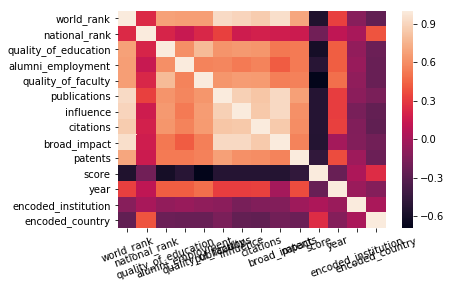

In [14]:
# Visualizations:

# Columns to use for visualization-
cols_to_use = []
cols_to_use = cwur_data.columns.tolist()

# Remove the following 2 columns from list-                            
cols_to_use.remove('country')
cols_to_use.remove('institution')

# Compute correlation for columns in 'cols_to_use'-
corr_mat = cwur_data.loc[:, cols_to_use].corr()

# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

# We can use the correlation graph for further exploratory analysis!

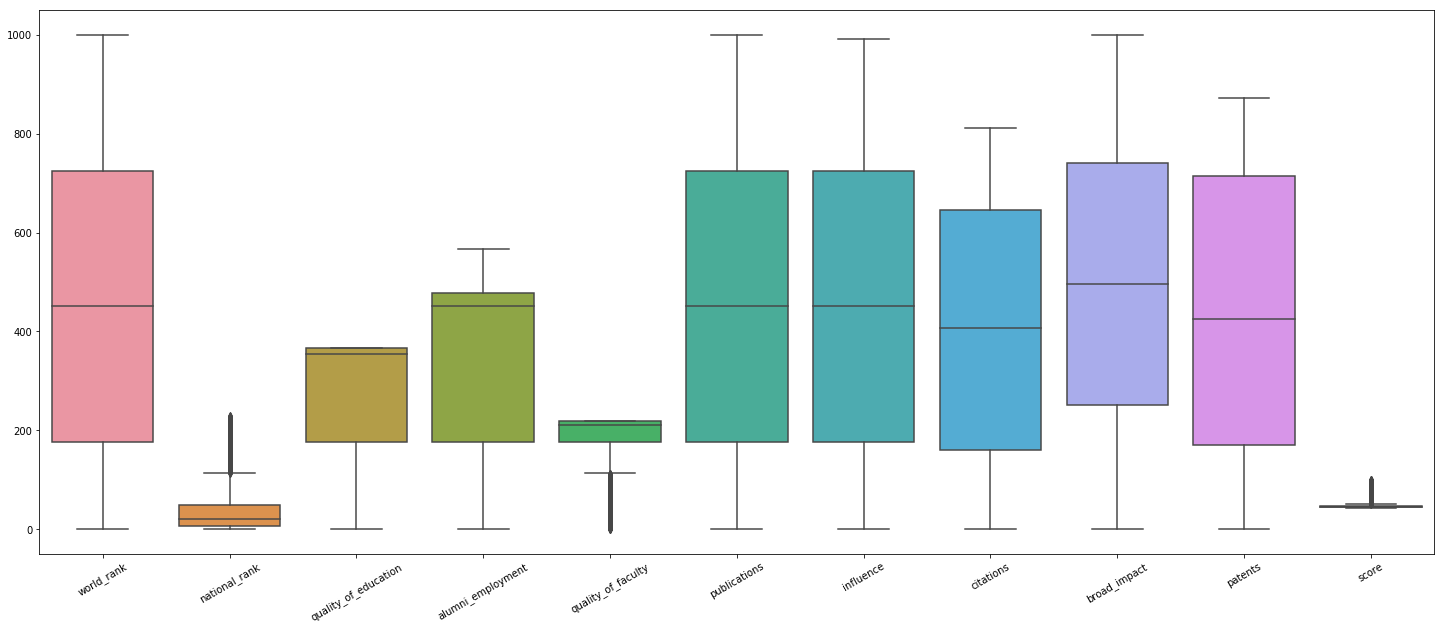

In [15]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_to_use.copy()

# Remove the following columns/attributes-
cols_boxplot.remove('year')
cols_boxplot.remove('encoded_country')
cols_boxplot.remove('encoded_institution')



# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = cwur_data.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

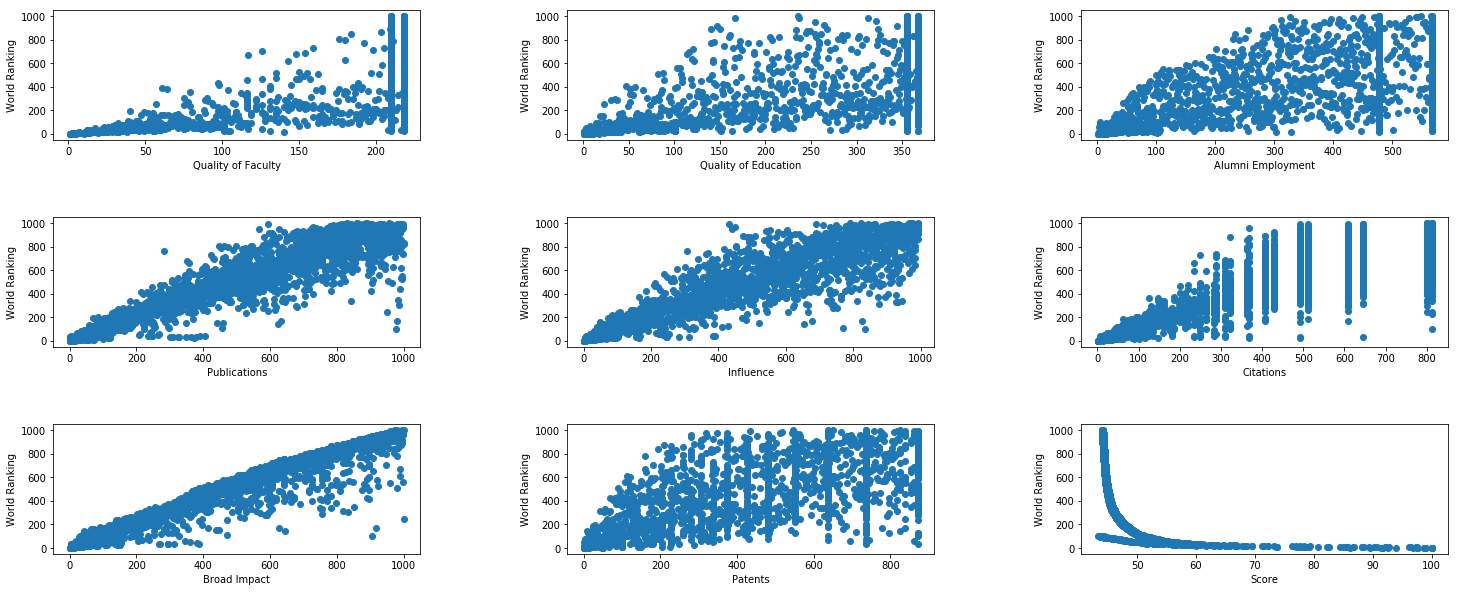

In [16]:
# Draw multiple plots together-
# Scatter plot of different attributes with 'world_rank' attribute to see correlation


fig, ax = plt.subplots(3, 3)

# Adjust spacing between plots-
fig.subplots_adjust(hspace = 0.6, wspace = 0.4)

ax[0, 0].scatter(cwur_data["quality_of_faculty"], cwur_data["world_rank"])
ax[0, 0].set_xlabel("Quality of Faculty")
ax[0, 0].set_ylabel("World Ranking")

ax[0, 1].scatter(cwur_data["quality_of_education"], cwur_data["world_rank"])
ax[0, 1].set_xlabel("Quality of Education")
ax[0, 1].set_ylabel("World Ranking")

ax[0, 2].scatter(cwur_data["alumni_employment"], cwur_data["world_rank"])
ax[0, 2].set_xlabel("Alumni Employment")
ax[0, 2].set_ylabel("World Ranking")

ax[1, 0].scatter(cwur_data["publications"], cwur_data["world_rank"])
ax[1, 0].set_xlabel("Publications")
ax[1, 0].set_ylabel("World Ranking")

ax[1, 1].scatter(cwur_data["influence"], cwur_data["world_rank"])
ax[1, 1].set_xlabel("Influence")
ax[1, 1].set_ylabel("World Ranking")

ax[1, 2].scatter(cwur_data["citations"], cwur_data["world_rank"])
ax[1, 2].set_xlabel("Citations")
ax[1, 2].set_ylabel("World Ranking")

ax[2, 0].scatter(cwur_data["broad_impact"], cwur_data["world_rank"])
ax[2, 0].set_xlabel("Broad Impact")
ax[2, 0].set_ylabel("World Ranking")

ax[2, 1].scatter(cwur_data["patents"], cwur_data["world_rank"])
ax[2, 1].set_xlabel("Patents")
ax[2, 1].set_ylabel("World Ranking")

ax[2, 2].scatter(cwur_data["score"], cwur_data["world_rank"])
ax[2, 2].set_xlabel("Score")
ax[2, 2].set_ylabel("World Ranking")

plt.show()


## Further data visualization

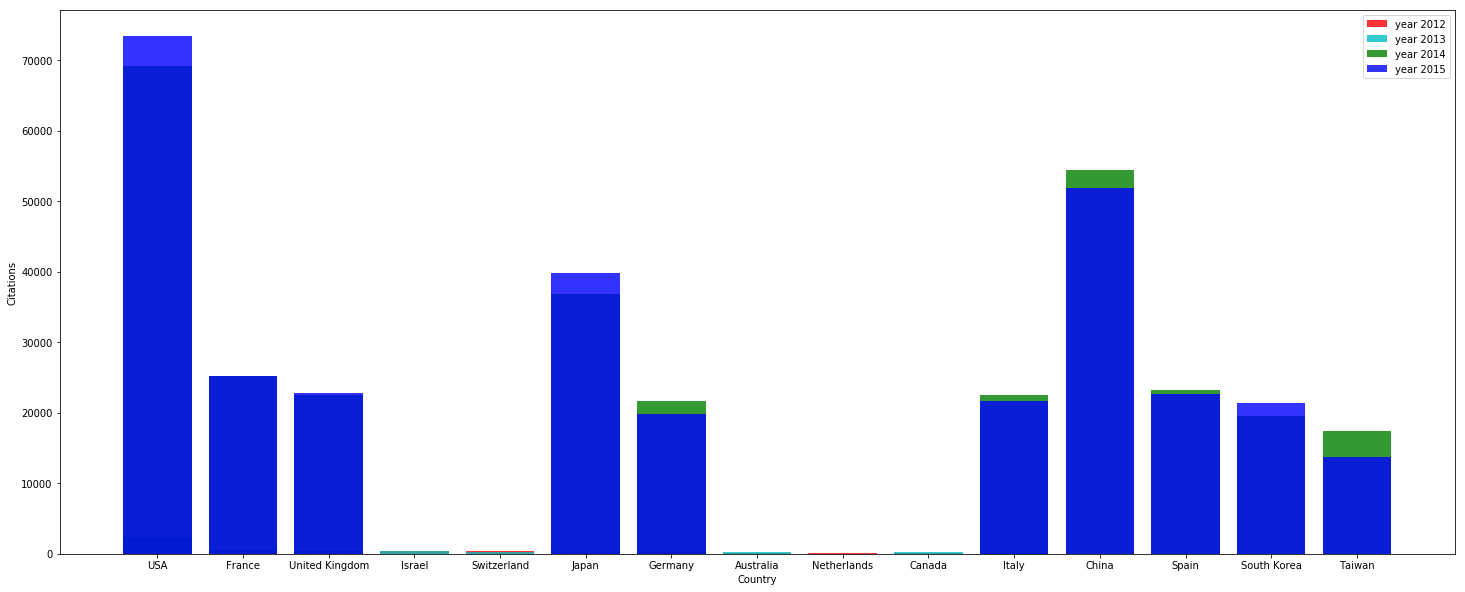

In [164]:
#it would be interesting to see, which countries were cited the most per year:

citation_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['citations'].agg('sum')).reset_index().sort_values(by=['year', 'citations'],ascending=False)
citation_data = citation_data.set_index(['country']).groupby('year')['citations'].nlargest(10).reset_index() 
citation_data

cit_2012 = citation_data.loc[citation_data['year'] == 2012].loc[:,'citations'].values
cit_2013 = citation_data.loc[citation_data['year'] == 2013].loc[:,'citations'].values
cit_2014 = citation_data.loc[citation_data['year'] == 2014].loc[:,'citations'].values
cit_2015 = citation_data.loc[citation_data['year'] == 2015].loc[:,'citations'].values

country_2012 = citation_data.loc[citation_data['year'] == 2012].loc[:,'country'].values
country_2013 = citation_data.loc[citation_data['year'] == 2013].loc[:,'country'].values
country_2014 = citation_data.loc[citation_data['year'] == 2014].loc[:,'country'].values
country_2015 = citation_data.loc[citation_data['year'] == 2015].loc[:,'country'].values

plt.bar(country_2012, cit_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, cit_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, cit_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, cit_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("Citations")
plt.xlabel("Country")

plt.show()


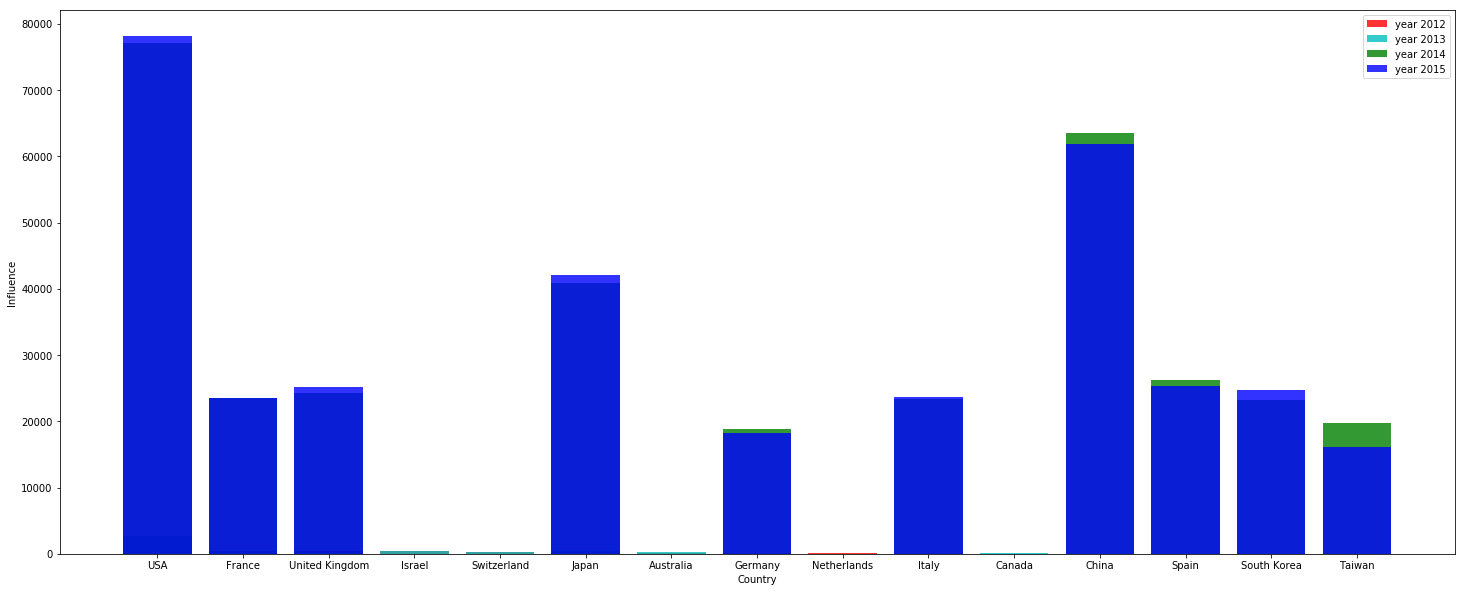

In [167]:
#similarly as above just instead of citations we are interestd in the influence of a given country

influence_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['influence'].agg('sum')).reset_index().sort_values(by=['year', 'influence'],ascending=False)
influence_data = influence_data.set_index(['country']).groupby('year')['influence'].nlargest(10).reset_index() 

inf_2012 = influence_data.loc[influence_data['year'] == 2012].loc[:,'influence'].values
inf_2013 = influence_data.loc[influence_data['year'] == 2013].loc[:,'influence'].values
inf_2014 = influence_data.loc[influence_data['year'] == 2014].loc[:,'influence'].values
inf_2015 = influence_data.loc[influence_data['year'] == 2015].loc[:,'influence'].values

country_2012 = influence_data.loc[influence_data['year'] == 2012].loc[:,'country'].values
country_2013 = influence_data.loc[influence_data['year'] == 2013].loc[:,'country'].values
country_2014 = influence_data.loc[influence_data['year'] == 2014].loc[:,'country'].values
country_2015 = influence_data.loc[influence_data['year'] == 2015].loc[:,'country'].values

plt.bar(country_2012, inf_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, inf_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, inf_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, inf_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("Influence")
plt.xlabel("Country")

plt.show()

#this plot is very similar to the above one, duuhh. We can maybe delete this one or the above one.

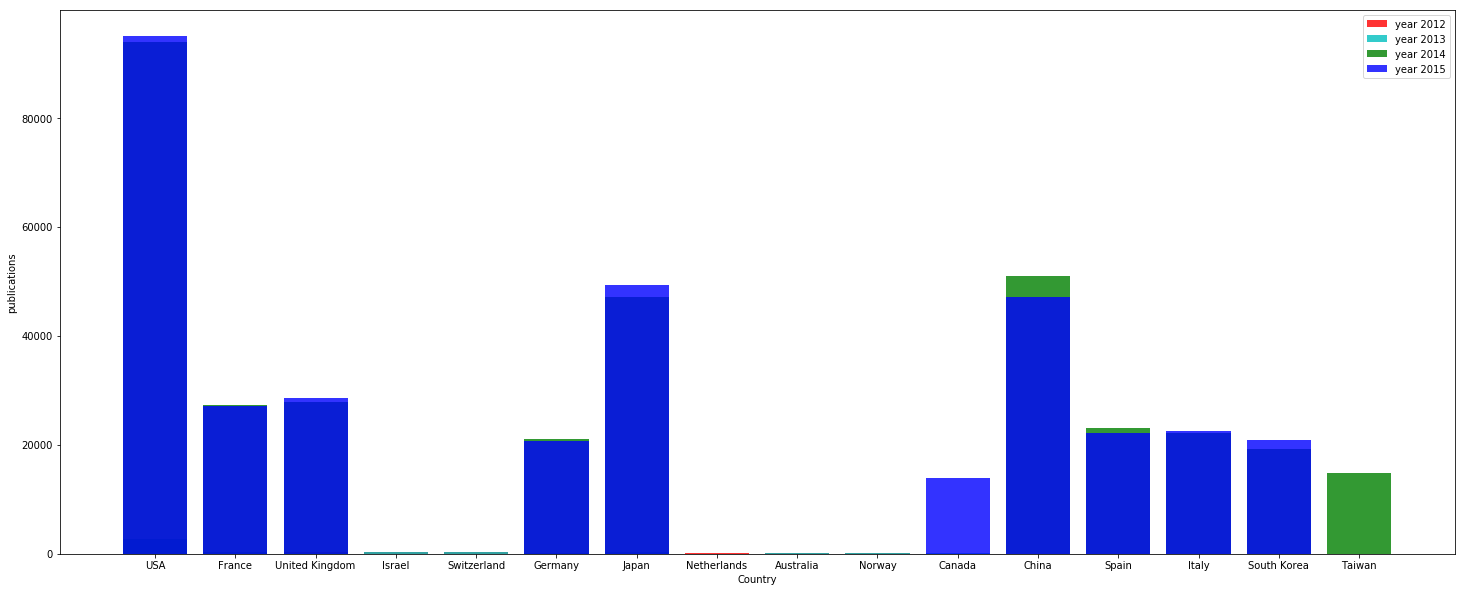

In [169]:
#let's see what happens with the publications:

publ_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['publications'].agg('sum')).reset_index().sort_values(by=['year', 'publications'],ascending=False)
publ_data = publ_data.set_index(['country']).groupby('year')['publications'].nlargest(10).reset_index() 

pub_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'publications'].values
pub_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'publications'].values
pub_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'publications'].values
pub_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'publications'].values

country_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'country'].values
country_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'country'].values
country_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'country'].values
country_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'country'].values

plt.bar(country_2012, pub_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, pub_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, pub_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, pub_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("publications")
plt.xlabel("Country")

plt.show()

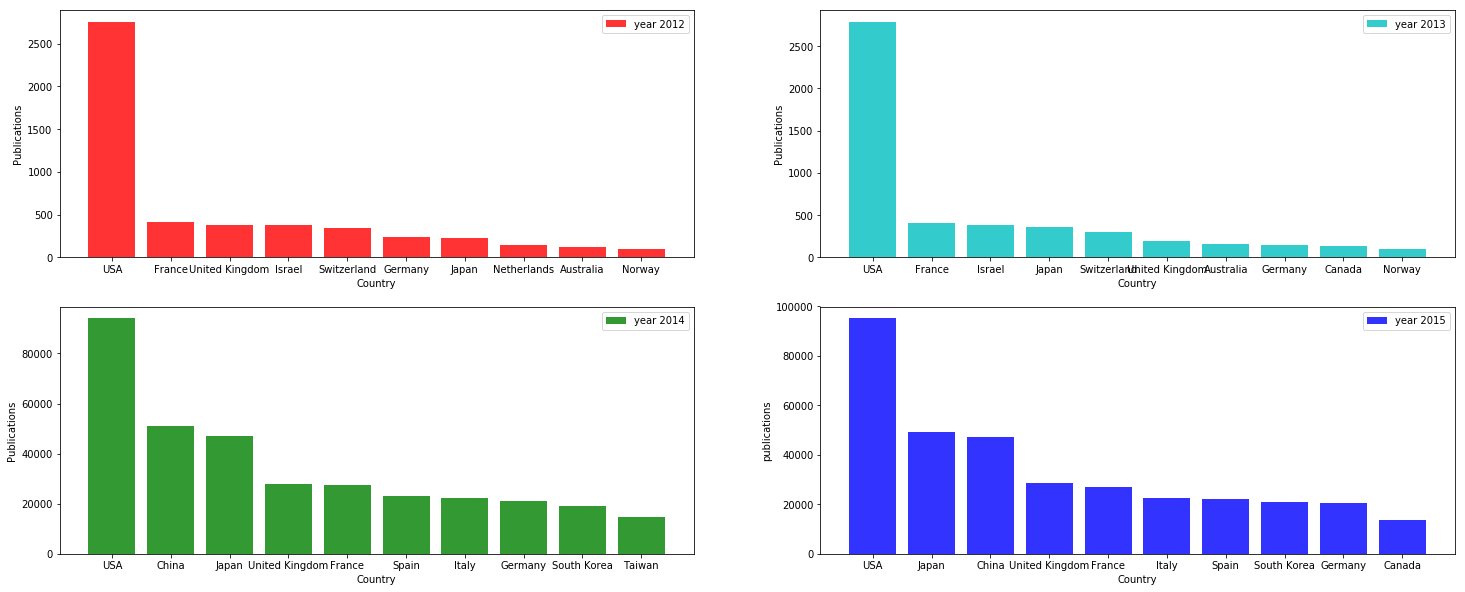

In [186]:
publ_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['publications'].agg('sum')).reset_index().sort_values(by=['year', 'publications'],ascending=False)
publ_data = publ_data.set_index(['country']).groupby('year')['publications'].nlargest(10).reset_index() 

pub_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'publications'].values
pub_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'publications'].values
pub_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'publications'].values
pub_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'publications'].values

country_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'country'].values
country_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'country'].values
country_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'country'].values
country_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'country'].values

fig, axes = plt.subplots(2, 2)

axes[0, 0].bar(country_2012, pub_2012, align='center', alpha=0.8, color='r', label="year 2012")
axes[0, 0].set_xlabel("Country")
axes[0, 0].set_ylabel("Publications")
axes[0, 0].legend(loc = 'upper right')

axes[0, 1].bar(country_2013, pub_2013, align='center', alpha=0.8, color='c', label="year 2013")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Publications")
axes[0, 1].legend(loc = 'upper right')

axes[1, 0].bar(country_2014, pub_2014, align='center', alpha=0.8, color='g', label="year 2014")
axes[1, 0].set_xlabel("Country")
axes[1, 0].set_ylabel("Publications")
axes[1, 0].legend(loc = 'upper right')

axes[1, 1].bar(country_2015, pub_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.ylabel("publications")
plt.xlabel("Country")
plt.legend(loc = 'upper right')

plt.show()